Click [here](https://morihosseini.medium.com/unlocking-the-power-of-a-b-testing-65f3f3ee67d1) to access the associated Medium article.

# A/B Testing

We’ll start by importing the necessary libraries for this tutorial: numpy, pandas, scipy, and matplotlib. If you don’t have these libraries installed, you can install them by running the following commands in your command prompt:

In [15]:
!python3 -m venv .venv

!source .venv/bin/activate  # for macOS and Linux
# !.venv\Scripts\activate.bat  # for Windows

!pip install -q numpy pandas scipy matplotlib

Once you have the libraries installed, you can import them in your Python script as follows:

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Next, we’ll load the data that we will be using for our A/B test. For the purpose of this tutorial, we’ll be using a simulated dataset that contains information about 10000 website visitors (5000 for the control group and 5000 for the treatment group) and whether they made a purchase or not. We’ll load this dataset using pandas, and then split it into our control and treatment groups:

In [17]:
# Create a simulated dataset with 5000 observations in each of the control
# and treatment groups
control_size = treatment_size = 5000
np.random.seed(777)  # Set the seed for reproducibility
data = pd.DataFrame(
    {
        "group": ["control"] * control_size + ["treatment"] * treatment_size,
        "purchased": np.random.randint(0, 2, control_size + treatment_size),
    }
)

# Split the data into the control and treatment groups
control = data[data["group"] == "control"]
treatment = data[data["group"] == "treatment"]

Now that we have our data loaded and split into our groups, we can start analyzing the results of our A/B test. In the next step, we’ll start by calculating the conversion rate for each group.

## Performing t-test

The conversion rate is the percentage of users who completed the desired action, in this case, making a purchase. We can calculate the conversion rate by dividing the number of purchases by the total number of visitors in each group.

In [18]:
# Calculate the conversion rate for the control group
control_conversion_rate = control["purchased"].mean()

# Calculate the conversion rate for the treatment group
treatment_conversion_rate = treatment["purchased"].mean()

print("Control conversion rate:", control_conversion_rate)
print("Treatment conversion rate:", treatment_conversion_rate)

Control conversion rate: 0.5088
Treatment conversion rate: 0.4912


We can use these conversion rates to determine whether the changes made in the treatment group had a positive impact on the desired outcome.

Now, we perform a hypothesis test to determine whether the observed difference in conversion rates between the control and treatment groups is statistically significant.

The null hypothesis for our test is that there is no difference in conversion rates between the control and treatment groups. The alternative hypothesis is that there is a difference in conversion rates between the control and treatment groups.

We’ll use a two-sample t-test to compare the means of the control and treatment groups. The t-test will calculate a p-value, which represents the probability of observing the difference in conversion rates between the two groups if the null hypothesis is true. If the p-value is less than our significance level (usually 0.05), we can reject the null hypothesis and conclude that the difference in conversion rates is statistically significant.

In [19]:
# Perform a two-sample t-test
t_stat, p_val = ttest_ind(control["purchased"], treatment["purchased"])

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 1.7600966160767242
p-value: 0.07842200109645418


In the next step, we’ll visualize the results of our A/B test using a histogram and a confidence interval.

## Analyzing the test results

We’ll start by plotting histograms, using the matplotlib library, for the control and treatment groups to visualize the distribution of our data.

This code bellow will create a histogram for each group and display them on the same plot. The alpha parameter controls the transparency of each histogram, and the label parameter adds a legend to the plot.

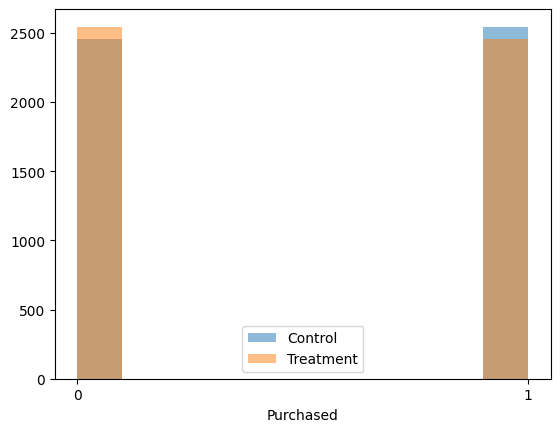

In [20]:
# Plot histograms for the control and treatment groups
plt.hist(control["purchased"], alpha=0.5, label="Control")
plt.hist(treatment["purchased"], alpha=0.5, label="Treatment")
plt.legend()
plt.xlabel("Purchased")
plt.xticks([0, 1])
plt.show()

Next, we’ll plot a confidence interval for the difference in means between the control and treatment groups. The confidence interval will give us a range of values that the true difference in means is likely to fall within.

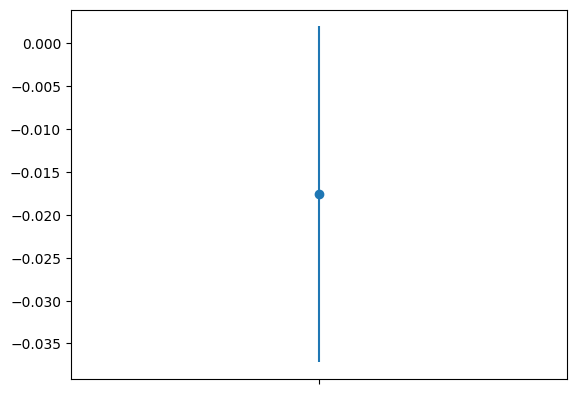

In [21]:
# Calculate the mean difference between the control and treatment groups
mean_difference = treatment_conversion_rate - control_conversion_rate

# Calculate the standard error of the mean difference
se = np.sqrt(
    (control["purchased"].var() / len(control))
    + (treatment["purchased"].var() / len(treatment))
)

# Calculate the margin of error for a 95% confidence interval
me = 1.96 * se

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_difference - me
upper_bound = mean_difference + me

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=me, fmt="o")
plt.xlim(-0.5, 0.5)
plt.xticks([0], [""])
plt.show()

This plot shows the mean difference between the two groups as a dot, with the confidence interval as vertical lines above and below the dot. If the confidence interval does not include zero, we can conclude that the difference in means between the two groups is statistically significant — which is clearly not the case here.

## Drawing conclusions from the test results

Now that we have visualized the results of our A/B test, let’s interpret our findings and draw conclusions.

Based on our hypothesis test and visualization, we can conclude whether the changes made in the treatment group had a statistically significant impact on the conversion rate compared to the control group. If the p-value from our hypothesis test is less than our significance level (usually 0.05), and the confidence interval does not include zero, we can conclude that the difference in conversion rates between the control and treatment groups is statistically significant and that the changes made in the treatment group had a positive impact on the desired outcome.

If the p-value is greater than our significance level, or the confidence interval includes zero, we cannot conclude that the difference in conversion rates between the control and treatment groups is statistically significant, and we cannot claim that the changes made in the treatment group had a positive impact on the desired outcome.

Based on our experiment here, the p-value is ~0.08 > 0.05 and the confidence interval includes zero, therefore, the positive impact of the modifications made in the treatment group on the desired outcome cannot be claimed.

It’s important to note that A/B testing is not a one-time process, and it may take several iterations to achieve statistically significant results. It’s also important to consider the practical significance of the observed difference in conversion rates, as even a statistically significant difference may not be meaningful in the context of the overall business goals.